module://matplotlib_inline.backend_inline


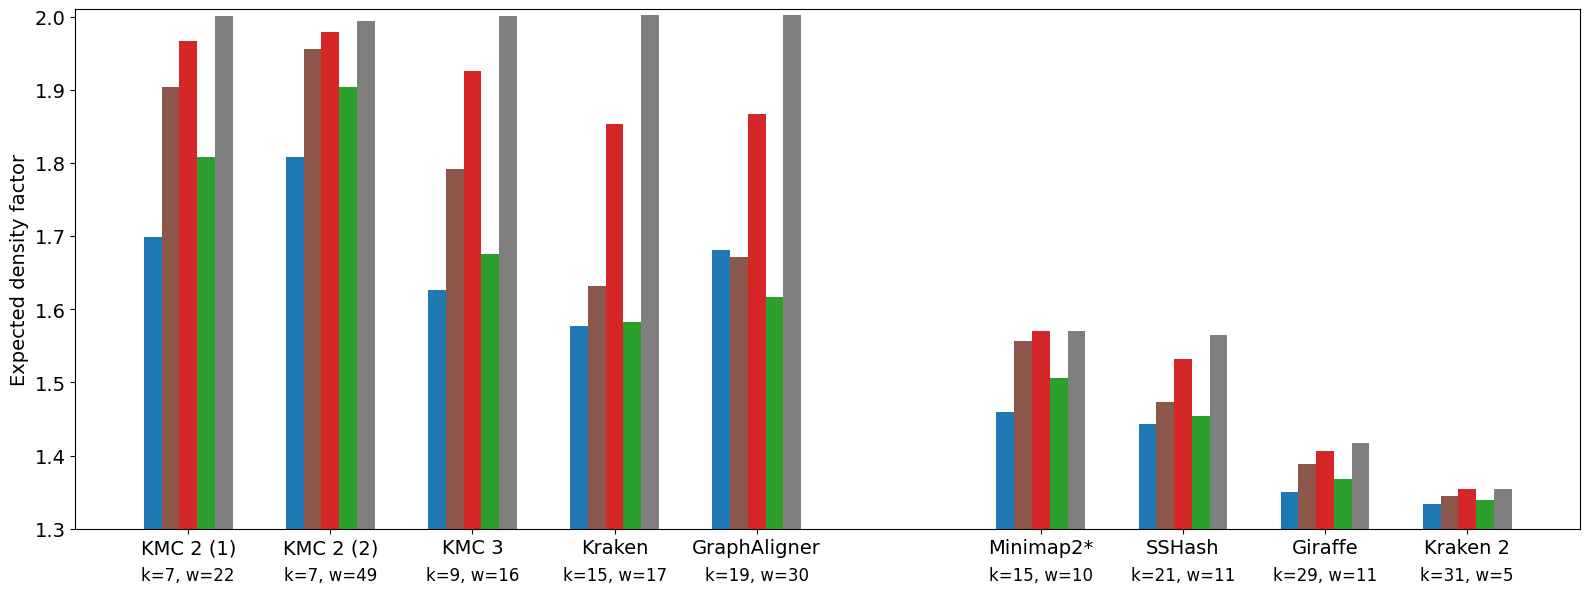

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scripts.plots import method_to_color

# =========================
# 1) Read the CSVs
# =========================
csv_file_path = 'matrices/specific_pairs.csv'
csv_file_path_mod = 'matrices/specific_pairs_mod.csv'

df = pd.read_csv(csv_file_path)
df_2 = pd.read_csv(csv_file_path_mod)

# =========================
# 2) Create a combined DataFrame:
#    Decide row by row whether to use normal or mod data
# =========================
columns_of_interest = ["GM+", "OC", "MC", "DD", "M"]  # Adjust if needed

df_combined = pd.DataFrame()
df_combined["Tool"] = df["Tool"]
df_combined["k"]    = df["k"]
df_combined["w"]    = df["w"]


# rename the tool Minimap 2 to Minimap2
df_combined["Tool"] = df_combined["Tool"].replace("Minimap 2", "Minimap2*")


# If row i has k > w, pull from df_2; otherwise from df
for col in columns_of_interest:
    df_combined[col] = [
        df_2.loc[i, col] if df.loc[i, "k"] > df.loc[i, "w"] else df.loc[i, col]
        for i in df.index
    ]

# =========================
# 3) Split into two groups:
#    A) w >= k  (normal)
#    B) k > w   (mod)
#    Then sort each group by (k, w) ascending
# =========================
df_part_normal = df_combined[df_combined["w"] >= df_combined["k"]].copy()
df_part_mod    = df_combined[df_combined["k"] > df_combined["w"]].copy()

df_part_normal.sort_values(["k", "w"], ascending=[True, True], inplace=True)
df_part_mod.sort_values(["k", "w"], ascending=[True, True], inplace=True)

df_part_normal.reset_index(drop=True, inplace=True)
df_part_mod.reset_index(drop=True, inplace=True)

# =========================
# 4) Prepare x-coordinates
#    We'll plot group A first, then leave a gap, then group B
# =========================
width = 0.15

# Number of rows in each group
nA = len(df_part_normal)
nB = len(df_part_mod)

# For group A, x from 0..(nA-1), each offset by 1.2
xA = np.arange(nA) * 1.2

# For group B, shift it by (nA + some gap) * 1.2
gap = 1  # how many "extra steps" of spacing
xB = np.arange(nB) * 1.2 + (nA + gap) * 1.2

# =========================
# 5) Plot
# =========================
plt.figure(figsize=(16, 6))  # a bit wider

# Color scheme

# ---- Plot group A (w >= k) ----
for idx, col in enumerate(columns_of_interest):
    plt.bar(
        xA + idx * width,
        df_part_normal[col],
        width,
        label=col if idx == 0 else "",  # Label only on first iteration (for legend)
        color=method_to_color(col),
    )
    
# ---- Plot group B (k > w) ----
for idx, col in enumerate(columns_of_interest):
    plt.bar(
        xB + idx * width,
        df_part_mod[col],
        width,
        label=col if idx == 0 else "",  # same label if you want a single legend
        color=method_to_color(col),
    )

# =========================
# 6) Set x-ticks, labels, etc.
#    We create one combined list of x-positions and labels
# =========================
# Center the x-tick at the middle of each group of bars
xA_labels = xA + width * (len(columns_of_interest) - 1) / 2
xB_labels = xB + width * (len(columns_of_interest) - 1) / 2

# Combine them
xtick_positions = np.concatenate([xA_labels, xB_labels])
xtick_labels    = list(df_part_normal["Tool"]) + list(df_part_mod["Tool"])

plt.xticks(xtick_positions, xtick_labels, fontsize=14, rotation=0)
plt.yticks(fontsize=14)
plt.ylim(1.3, 2.01)
plt.ylabel("Expected density factor", fontsize=14)

# =========================
# 7) Add k,w text below each bar group
# =========================
# For group A
for i in range(nA):
    k_value = df_part_normal.loc[i, "k"]
    w_value = df_part_normal.loc[i, "w"]
    plt.text(
        xA_labels[i],
        1.23,
        f"k={k_value}, w={w_value}",
        ha='center',
        fontsize=12
    )

# For group B
for i in range(nB):
    k_value = df_part_mod.loc[i, "k"]
    w_value = df_part_mod.loc[i, "w"]
    plt.text(
        xB_labels[i],
        1.23,
        f"k={k_value}, w={w_value}",
        ha='center',
        fontsize=12
    )

# =========================
# 8) Legend, save, show
# =========================
#plt.legend(columns_of_interest, title="Metrics", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig("combined_two_areas.svg")
plt.show()


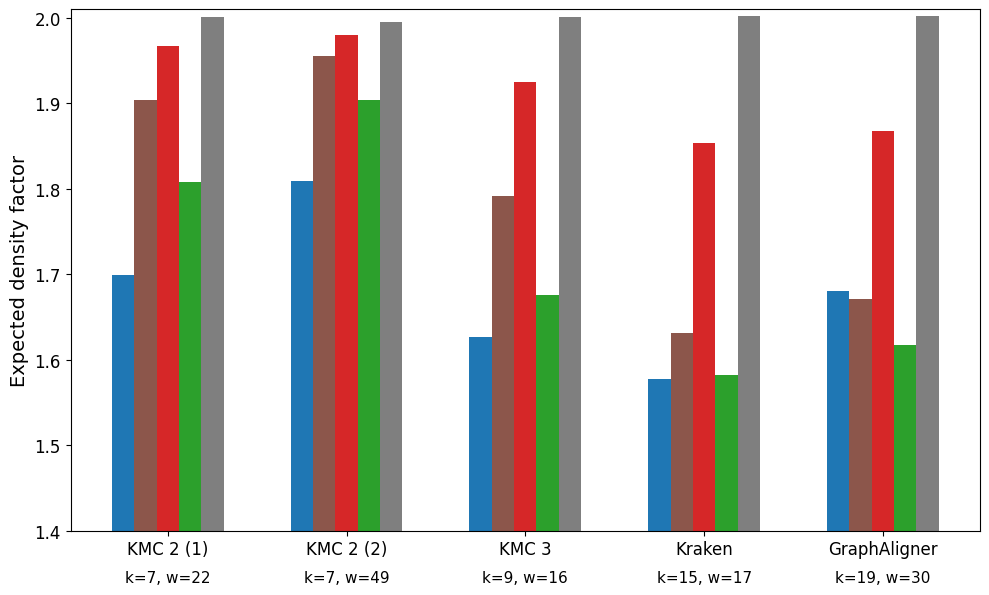

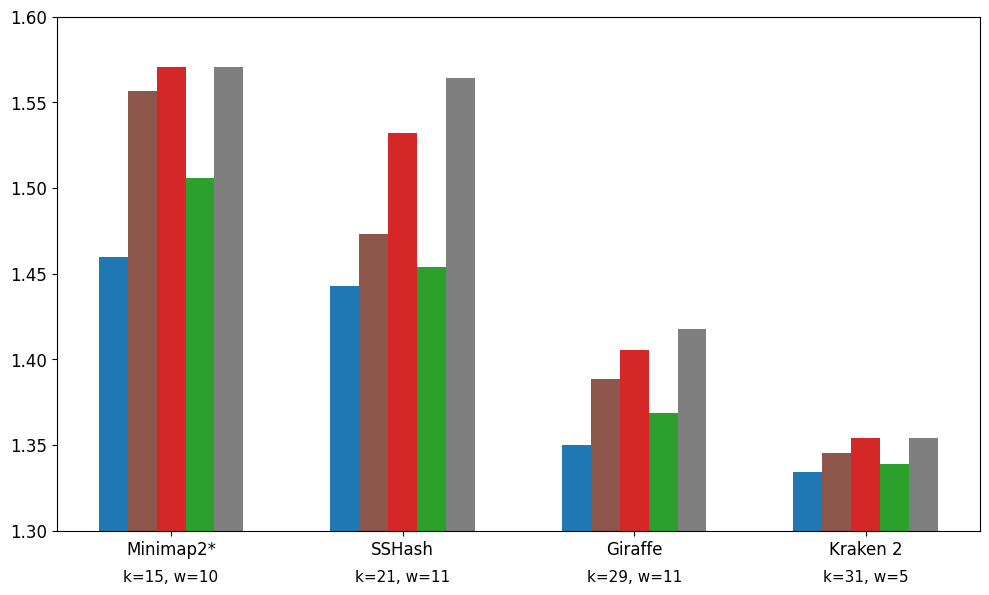

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scripts.plots import method_to_color

# =========================
# 1) Read the CSVs
# =========================
csv_file_path = 'matrices/specific_pairs.csv'
csv_file_path_mod = 'matrices/specific_pairs_mod.csv'

df = pd.read_csv(csv_file_path)
df_2 = pd.read_csv(csv_file_path_mod)

# =========================
# 2) Create a combined DataFrame:
#    Decide row by row whether to use normal or mod data
# =========================
columns_of_interest = ["GM+", "OC", "MC", "DD", "M"]  # Adjust if needed

df_combined = pd.DataFrame()
df_combined["Tool"] = df["Tool"]
df_combined["k"]    = df["k"]
df_combined["w"]    = df["w"]

# Rename the tool Minimap 2 to Minimap2*
df_combined["Tool"] = df_combined["Tool"].replace("Minimap 2", "Minimap2*")

# If row i has k > w, pull from df_2; otherwise from df
for col in columns_of_interest:
    df_combined[col] = [
        df_2.loc[i, col] if df.loc[i, "k"] > df.loc[i, "w"] else df.loc[i, col]
        for i in df.index
    ]

# =========================
# 3) Split into two groups:
#    A) w >= k  (normal)
#    B) k > w   (mod)
#    Then sort each group by (k, w) ascending
# =========================
df_part_normal = df_combined[df_combined["w"] >= df_combined["k"]].copy()
df_part_mod    = df_combined[df_combined["k"] > df_combined["w"]].copy()

df_part_normal.sort_values(["k", "w"], ascending=[True, True], inplace=True)
df_part_mod.sort_values(["k", "w"], ascending=[True, True], inplace=True)

df_part_normal.reset_index(drop=True, inplace=True)
df_part_mod.reset_index(drop=True, inplace=True)

# =========================
# 4) First Plot: Group A (w >= k)
# =========================

# Prepare x-coordinates
width = 0.15
nA = len(df_part_normal)
xA = np.arange(nA) * 1.2  # spacing

plt.figure(figsize=(10, 6))  # Create the first figure

# Plot bars for each column in columns_of_interest
for idx, col in enumerate(columns_of_interest):
    plt.bar(
        xA + idx * width,
        df_part_normal[col],
        width,
        label=col if idx == 0 else "",  # Label only on first iteration
        color=method_to_color(col),
    )

# Set x-tick positions (center them under the group of bars)
xA_labels = xA + width * (len(columns_of_interest) - 1) / 2
plt.xticks(xA_labels, df_part_normal["Tool"], fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.ylim(1.4, 2.01)
plt.ylabel("Expected density factor", fontsize=14)

# Add k,w text below each bar group
for i in range(nA):
    k_value = df_part_normal.loc[i, "k"]
    w_value = df_part_normal.loc[i, "w"]
    plt.text(
        xA_labels[i],
        1.34,
        f"k={k_value}, w={w_value}",
        ha='center',
        fontsize=11
    )

# If you want a legend for columns_of_interest:
# plt.legend(columns_of_interest, title="Metrics", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig("plot_normal_w_ge_k.svg")
plt.show()


# =========================
# 5) Second Plot: Group B (k > w)
# =========================

# Prepare x-coordinates
nB = len(df_part_mod)
xB = np.arange(nB) * 1.2

plt.figure(figsize=(10, 6))  # Create the second figure

# Plot bars for each column
for idx, col in enumerate(columns_of_interest):
    plt.bar(
        xB + idx * width,
        df_part_mod[col],
        width,
        label=col if idx == 0 else "",
        color=method_to_color(col),
    )

# Set x-ticks
xB_labels = xB + width * (len(columns_of_interest) - 1) / 2
plt.xticks(xB_labels, df_part_mod["Tool"], fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.ylim(1.3, 1.6)

# IMPORTANT: Remove y-axis label on the second plot
plt.ylabel("")  # or you could omit this line entirely to have no label

# Add k,w text
for i in range(nB):
    k_value = df_part_mod.loc[i, "k"]
    w_value = df_part_mod.loc[i, "w"]
    plt.text(
        xB_labels[i],
        1.27,
        f"k={k_value}, w={w_value}",
        ha='center',
        fontsize=11
    )

plt.tight_layout()
plt.savefig("plot_mod_k_gt_w.svg")
plt.show()
